<h3><center>ECE 49500/59500 Machine Learning<center>
<center>Spring 2020<center>
<h2><center>K-means for image compression via color quantization<center>
    <h4>Yanan Song

In a lecture regarding K-means, we have learned color quantization with K-means for a purpose of image compression. In this exercise, you will implement K-means algorithm to compress an image. The image (i.e., parrot.jpg) that you’ll be working on is size of 400 × 500 × 3. Thus, for each pixel location there are three 8-bit integers that specify the red, green, and blue intensity values. Our goal is to reduce the number of colors to 4 (i.e., K=4 in the K-means) and represent the image using those 4 colors only so that we achieve the goal of image compression. Specically, you only need to store the RGB values of the 4 selected colors, and only store the index of the color at that location where only 2 bits (log2 4) are necessary to represent 4 possibilities. (Check my lecture slides regarding color quantization with K-means for more details)
In the implementation of K-means, you will treat every pixel in the original image as a data example and use the K-means algorithm to cluster all pixels into 4 groups (colors) in the 3- dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the final 4 centroids’ values to replace the pixels in the original image.

1) Input: color image named “parrot.jpg” with three color channels: R,G,B for each pixel
2) Reshape the image to an array of 𝑁 × 3 size (N is the total number of pixels in image, i.e., 𝑁 =400 × 500).

(200000, 3)


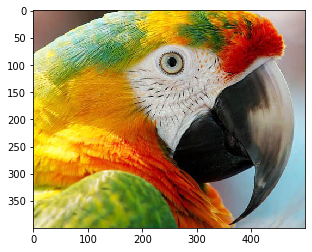

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
# from numba import jit
# from numba import jitclass
from numba import int32, float32

image = plt.imread('./parrot.jpg')
plt.imshow(image)
height = image.shape[0]
width = image.shape[1]
image = image.reshape((height * width,3))
print(image.shape)

3) Apply the K-means clustering algorithm to the reshaped image. (You cannot use a build-in function of K-means such as K-means from Scikit-learn library)

In [118]:
# spec = [
#     ('n_clusters', int32),
#     ('max_iter', int32),
#     ('tol', float32),
# ]
# @jitclass(spec)
class KMeans:
    def __init__(self, n_clusters = 8, max_iter = 300, tol= 0.01):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.labels_ = None
        self.cluster_centers_ = None
        self.tol = tol

    def init_centroids(self, X):
        centers = np.empty((self.n_clusters, X.shape[1]))
        center_id = random.sample(range(0, X.shape[0]), self.n_clusters)
        for i in range(0, self.n_clusters):
            centers[i] = X[center_id[i]]
        return centers

    def euclidean_distance(self,x1, x2):
        distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))                
        return distance

    def fit(self, X):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        centroids = self.init_centroids(X)
#         print(centroids.shape)
#         print(centroids)
        for i in range(self.max_iter):
            print(i)
            if i != 0:
                centroids = new_centroids
            distance = np.empty((n_samples, self.n_clusters))
            for j in range(n_samples):
                for k in range(self.n_clusters):
                    distance[j][k] = self.euclidean_distance(centroids[k], X[j])
#             print(distance)
            centroid_index = np.argmin(distance, axis=1)
#             print(centroid_index.shape)
            new_centroids = np.zeros((self.n_clusters, X.shape[1]))
            count = np.bincount(centroid_index)
#             print(count)
            for l in range(0, self.n_clusters):
                for m in range(0, n_samples):
                    if centroid_index[m] == l:
                        new_centroids[l] += X[m] / count[l]
            if np.allclose(centroids, new_centroids,self.tol,self.tol):
                break
#             print(centroids)
#             print(new_centroids)
        self.cluster_centers_ = new_centroids
        self.labels_ = centroid_index
        return self
        


In [122]:
@jit(('int32'))
def compress():
    kmeans = KMeans(n_clusters=8).fit(image)
    return kmeans
kmeans = compress()

<ipython-input-122-080b076dd905>:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compress" failed type inference due to: Untyped global name 'KMeans': cannot determine Numba type of <class 'type'>

File "<ipython-input-122-080b076dd905>", line 3:
def compress():
    kmeans = KMeans(n_clusters=8).fit(image)
    ^

  @jit
/Users/yanan/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "compress" was compiled in object mode without forceobj=True.

File "<ipython-input-122-080b076dd905>", line 2:
@jit
def compress():
^

  self.func_ir.loc))
/Users/yanan/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-ba

0
1
2
3
4
5


KeyboardInterrupt: 

4) Assign centroid values (R,G,B) to all pixels, such that resulting image will have specified number of colors.

In [51]:
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8)
pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
pixel_centroid = pixel_centroid.astype("uint8")


5) Reshape it back to the size of original image.

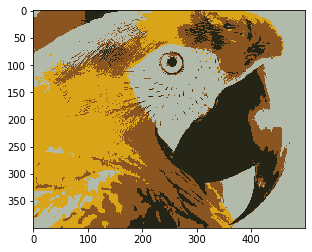

In [52]:
pixel_centroids_reshaped = np.reshape(pixel_centroid, (height, width, 3), "C")
plt.imshow(pixel_centroids_reshaped)

6) Compute the sizes of the origonial image and the compressed image, then calculate the
compression rate (%). (Check my lecture slides regarding color quantization with K-means)

In [53]:
original_size = width * height * 24
compressed_size = 24 * 4 + width * height * math.log2(4)
compress_rate = compressed_size / original_size

In [54]:
print(compress_rate * 100, '% of original')

8.335333333333333 % of original


<center>Summary</center>
In this assignment, I implement the K Means algorithm and use it for image compression, set K=4 the compressed size of the image is about 8.3% of the original image. 